### 1. 데이터셋 불러오기

In [1]:
#필요한 것 들
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
#데이터셋 불러오고 확인해보기
df_test = pd.read_csv('./data/samsung.csv')
df_test.head()
print(df_test.iloc[0,0])
df_test = df_test.iloc[:,1:]
df_test.head()

2022-11-22


,close,start,high,low,volume,transactionPrice,capitalization
0,60600,60900,61200,60300,9411289,5.714610e+11,3.617690e+14
1,61400,61400,61800,60800,9378097,5.737830e+11,3.665450e+14
2,61800,61800,62400,61400,12236503,7.574550e+11,3.689330e+14
3,61400,62000,62000,61300,13298296,8.191190e+11,3.665450e+14
4,62700,62400,62700,61700,12909260,8.042200e+11,3.743050e+14


### 2. 데이터 정규화 하기 by MinMaxScaler

In [3]:
#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_test)
scaled_ = scaler_.transform(df_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_test['close'].values.reshape(-1,1))

print(df)
print(f"최소\n{df.min()}")
print(f"최대\n{df.max()}")

            0         1         2         3         4         5         6
0    0.286738  0.303887  0.279412  0.299296  0.113235  0.100030  0.286738
1    0.315412  0.321555  0.301471  0.316901  0.112203  0.101046  0.315413
2    0.329749  0.335689  0.323529  0.338028  0.201041  0.181389  0.329751
3    0.315412  0.342756  0.308824  0.334507  0.234042  0.208362  0.315413
4    0.362007  0.356890  0.334559  0.348592  0.221950  0.201845  0.362004
..        ...       ...       ...       ...       ...       ...       ...
243  0.706093  0.749117  0.753676  0.711268  0.224840  0.263153  0.706093
244  0.756272  0.805654  0.790441  0.767606  0.211073  0.256676  0.756274
245  0.795699  0.837456  0.830882  0.785211  0.307203  0.363683  0.795702
246  0.813620  0.837456  0.823529  0.799296  0.505394  0.574749  0.813624
247  0.799283  0.742049  0.794118  0.746479  0.675631  0.745568  0.799287

[248 rows x 7 columns]
최소
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
최대
0   

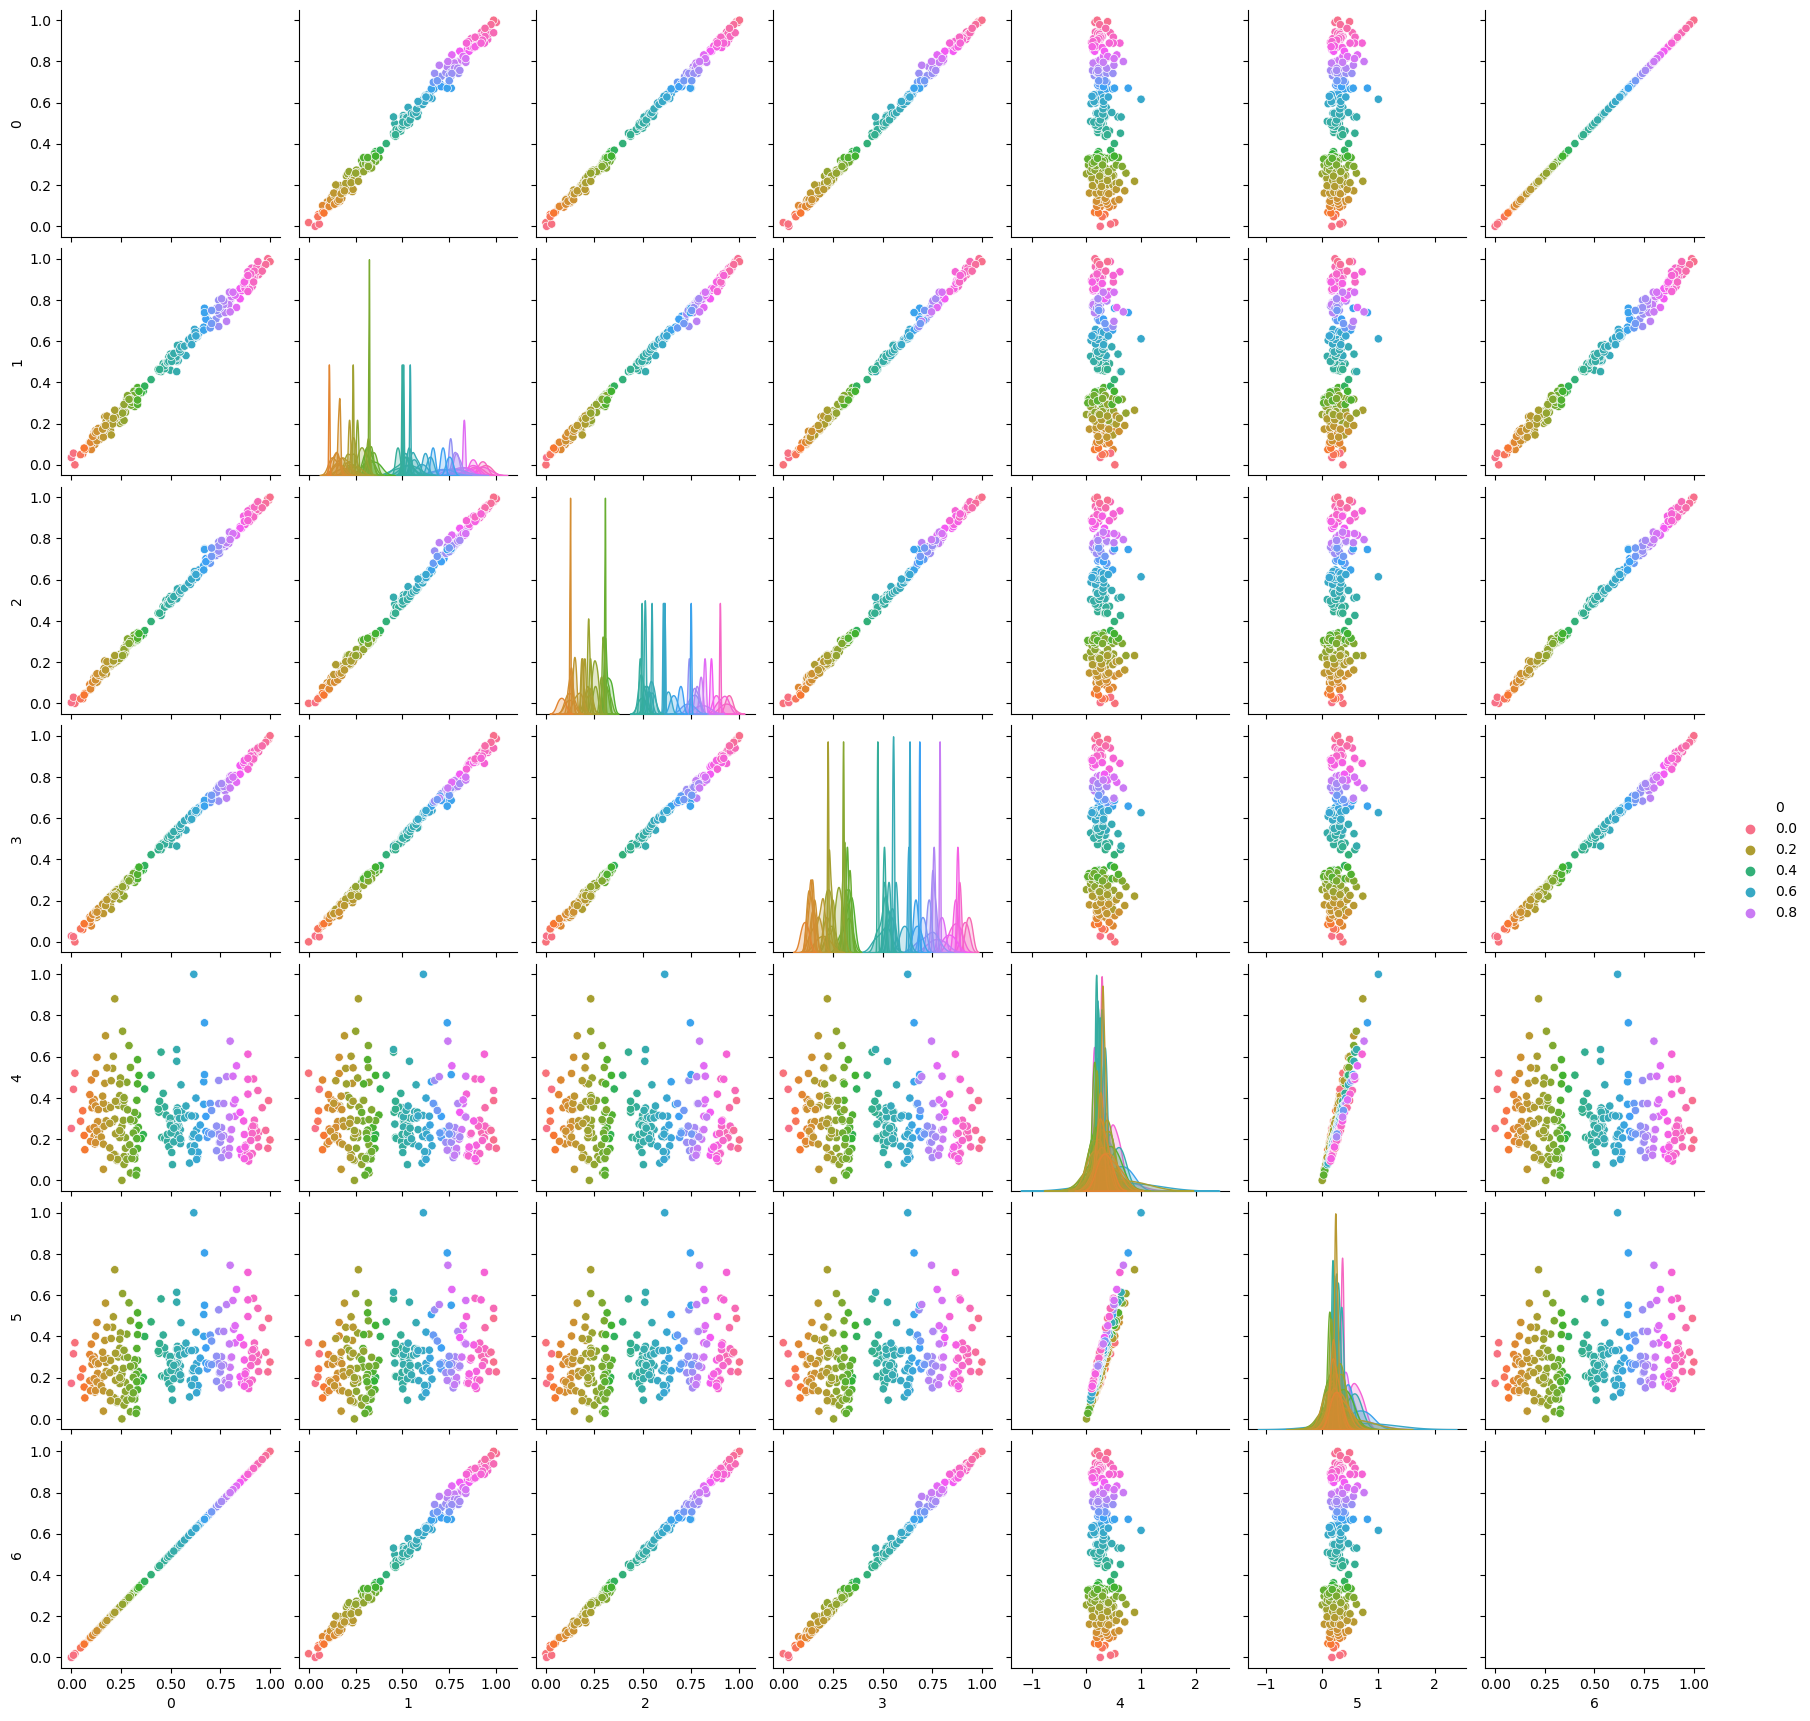

In [4]:
#데이터셋 분석해보기(상관관계 분석)

cols = [0,1,2,3,4,5,6]
sns.pairplot(data = df, vars = cols, hue = 0, palette = 'husl')
plt.show()

### 3. 학습 및 테스트 데이터와 모델 만들기

In [5]:
#학습 데이터 쪼개기

X = df.iloc[:, 1:7]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True) #여기서 20% 나눠주고

In [6]:
print(X_train)

            1         2         3         4         5         6
148  0.501767  0.496324  0.503521  0.135237  0.145456  0.505374
30   0.074205  0.077206  0.077465  0.487016  0.362795  0.100357
189  0.787986  0.783088  0.788732  0.155382  0.201070  0.795702
42   0.109541  0.069853  0.112676  0.189455  0.136580  0.096772
117  0.505300  0.492647  0.514085  0.285669  0.286032  0.505374
..        ...       ...       ...       ...       ...       ...
58   0.282686  0.268382  0.285211  0.115992  0.100721  0.265232
109  0.318021  0.290441  0.295775  0.654018  0.563144  0.290323
97   0.162544  0.143382  0.144366  0.597169  0.467908  0.129032
180  0.706714  0.691176  0.693662  0.208654  0.242590  0.684587
38   0.053004  0.022059  0.059859  0.337630  0.242492  0.057344

[198 rows x 6 columns]


In [7]:
#모델 만들기

model = Sequential()
model.add(Dense(10, input_dim = 6, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


### 4. 학습 및 결과 시각화

Epoch 1/8000
4/4 [==============================] - 0s 25ms/step - loss: 5.1924e-06 - accuracy: 0.0068 - val_loss: 1.0183e-05 - val_accuracy: 0.0000e+00
Epoch 2/8000
4/4 [==============================] - 0s 8ms/step - loss: 5.1936e-06 - accuracy: 0.0068 - val_loss: 1.0223e-05 - val_accuracy: 0.0000e+00
Epoch 3/8000
4/4 [==============================] - 0s 16ms/step - loss: 5.4048e-06 - accuracy: 0.0068 - val_loss: 9.4313e-06 - val_accuracy: 0.0000e+00
Epoch 4/8000
4/4 [==============================] - 0s 10ms/step - loss: 5.1351e-06 - accuracy: 0.0068 - val_loss: 1.0640e-05 - val_accuracy: 0.0000e+00
Epoch 5/8000
4/4 [==============================] - 0s 9ms/step - loss: 5.2116e-06 - accuracy: 0.0068 - val_loss: 9.7174e-06 - val_accuracy: 0.0000e+00
Epoch 6/8000
4/4 [==============================] - 0s 8ms/step - loss: 5.3920e-06 - accuracy: 0.0068 - val_loss: 1.0287e-05 - val_accuracy: 0.0000e+00
Epoch 7/8000
4/4 [==============================] - 0s 8ms/step - loss: 5.1431e-06 - 

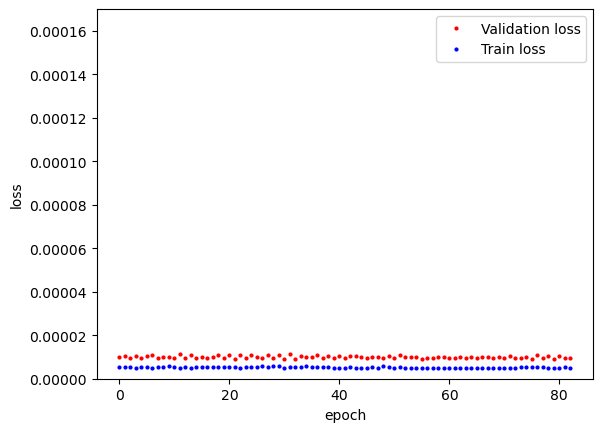

In [49]:
#학습 및 가장 잘 학습된 모델 저장

modelpath = './data/stock_model/stock_best_model.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0,#화면 출력을 간결하게게
                               save_best_only = True) #save best model

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50)
history = model.fit(X_train, y_train, epochs = 8000, batch_size = 37, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])



score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
hist_df = pd.DataFrame(history.history)
#print(hist_df)

y_val_loss = hist_df['val_loss']
y_train_loss = hist_df['loss']

x_len = np.arange(len(y_train_loss))
plt.plot(x_len, y_val_loss, 'o', c = 'red', markersize = 2, label = 'Validation loss')
plt.plot(x_len, y_train_loss, 'o', c = 'blue', markersize = 2, label = 'Train loss')

plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.00017])
plt.show()

8000 epochs 까지 돌려본 결과 에폭수에 큰 상관 없이 학습이 아주 잘된다. 레이블과 데이터의 연관성이 아주 높아서 그런것 같다.  
상관성이 아주 높기때문에 적은양의 에폭으로 학습이 가능 한 것 같다.  
계속 다시 학습시켜도 Test loss: 0.00009... 근방 인줄 알았다. 하지만 batch_size = 1,5,10,15,25,50,100,150,37 등 여러 배치 사이즈로 각각 많이 돌려봤는데  
큰 차이는 아니지만 배치 사이즈가 37일때 가장 작은 것 같다.

In [50]:
hist_df = pd.DataFrame(history.history)
print(hist_df) #심심해서 출력해보는 히스토리

        loss  accuracy  val_loss  val_accuracy
0   0.000005  0.006757  0.000010           0.0
1   0.000005  0.006757  0.000010           0.0
2   0.000005  0.006757  0.000009           0.0
3   0.000005  0.006757  0.000011           0.0
4   0.000005  0.006757  0.000010           0.0
..       ...       ...       ...           ...
78  0.000005  0.006757  0.000011           0.0
79  0.000005  0.006757  0.000009           0.0
80  0.000005  0.006757  0.000010           0.0
81  0.000005  0.006757  0.000009           0.0
82  0.000005  0.006757  0.000009           0.0

[83 rows x 4 columns]


2/2 [==============================] - 0s 2ms/step
Real price: 0.6200716845878136, Expected price: 0.6202341914176941
Real price: 0.5483870967741937, Expected price: 0.5464783906936646
Real price: 0.6774193548387097, Expected price: 0.6745569705963135
Real price: 0.6989247311827957, Expected price: 0.6944827437400818
Real price: 0.9103942652329751, Expected price: 0.9161246418952942
Real price: 0.4838709677419353, Expected price: 0.4851848781108856
Real price: 0.2329749103942651, Expected price: 0.22749197483062744
Real price: 0.7921146953405016, Expected price: 0.7918283939361572
Real price: 0.8673835125448031, Expected price: 0.8708717823028564
Real price: 0.2078853046594984, Expected price: 0.20692524313926697
Real price: 0.6200716845878136, Expected price: 0.6210364699363708
Real price: 0.46953405017921157, Expected price: 0.4690614640712738
Real price: 0.8745519713261649, Expected price: 0.8744858503341675
Real price: 0.6236559139784947, Expected price: 0.6223705410957336
Real pri

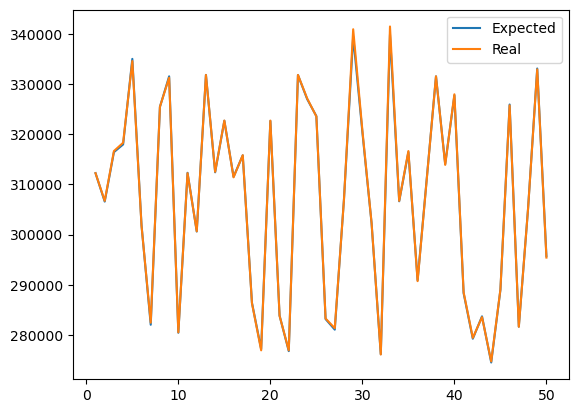

In [51]:
#결과 시각화 하기

real_prices_n = []
pred_prices_n = []
X_num = []
y_test_set = y_test.to_numpy() #인덱스가 뒤죽박죽이어서 인덱스도 바꾸고 데이타 타입도 바꿔줄 겸 쫙~~

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(len(X_test)):
  real = y_test_set[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n)) #노멀라이징 된 예측값을 원래 주가로 돌려주기 위함이다.
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() #테스트한 값이 실제 값과 아주 꼭 맞는다.

### 5. 다른 데이터로 검증
삼성전자 주가 20년1월2일 ~ 20년 12월 30일 까지 데이터로 검증해보기  
sk 하이닉스 주가 22년 11월 27일 까지 1년간 데이터로 테스트  
농심 주가 22년 11월 27일 까지 1년간 데이터로 테스트

In [52]:
#한국 거래소 '정보데이터 시스템'에서 20년도 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/samsung_2020.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

MinMaxScaler()

8/8 [==============================] - 0s 2ms/step
Real price: 0.32987012987012987, Expected price: 0.33289065957069397
Real price: 0.3376623376623378, Expected price: 0.3364884853363037
Real price: 0.3376623376623378, Expected price: 0.33690348267555237
Real price: 0.34545454545454546, Expected price: 0.3481300473213196
Real price: 0.37142857142857144, Expected price: 0.3714399039745331
Real price: 0.4181818181818182, Expected price: 0.4123486280441284
Real price: 0.4415584415584417, Expected price: 0.4361267387866974
Real price: 0.4545454545454546, Expected price: 0.4484824538230896
Real price: 0.4545454545454546, Expected price: 0.45236238837242126
Real price: 0.4285714285714286, Expected price: 0.4244542419910431
Real price: 0.47272727272727266, Expected price: 0.467142254114151
Real price: 0.48831168831168825, Expected price: 0.48502856492996216
Real price: 0.5168831168831169, Expected price: 0.5163693428039551
Real price: 0.49090909090909096, Expected price: 0.49035993218421936
R

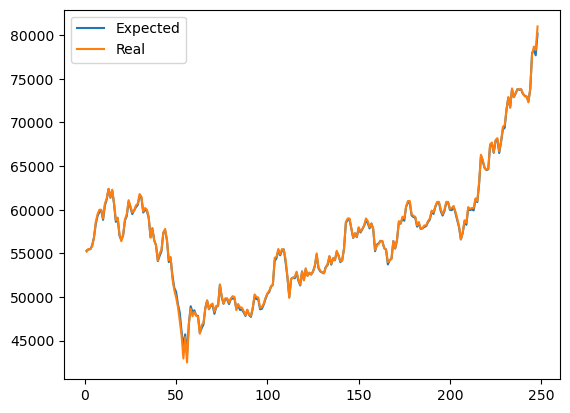

In [53]:
real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show()

삼성전자와 비슷한 주가 그리고 성격을 띄는 sk 하이닉스 주가로 테스트

8/8 [==============================] - 0s 1ms/step
Real price: 0.703065134099617, Expected price: 0.7003404498100281
Real price: 0.664750957854406, Expected price: 0.6620766520500183
Real price: 0.674329501915709, Expected price: 0.6795462369918823
Real price: 0.6360153256704979, Expected price: 0.6368887424468994
Real price: 0.6839080459770115, Expected price: 0.6778908371925354
Real price: 0.7509578544061302, Expected price: 0.7516005635261536
Real price: 0.7126436781609196, Expected price: 0.7023387551307678
Real price: 0.7222222222222221, Expected price: 0.7178011536598206
Real price: 0.7796934865900382, Expected price: 0.7821791768074036
Real price: 0.7509578544061302, Expected price: 0.7566681504249573
Real price: 0.8180076628352488, Expected price: 0.8149501085281372
Real price: 0.7605363984674327, Expected price: 0.7620843052864075
Real price: 0.7796934865900382, Expected price: 0.7879588007926941
Real price: 0.7701149425287357, Expected price: 0.7759730219841003
Real price: 0.

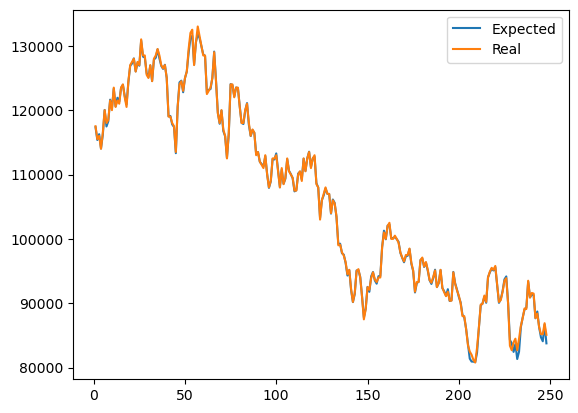

In [54]:
#한국 거래소 '정보데이터 시스템'에서 22년 11월 27일까지 sk 하이닉스 1년간 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/skhynix.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() #아주 잘 맞추는 것 같다.

성격이 전혀 다른 농심으로 테스트

8/8 [==============================] - 0s 1ms/step
Real price: 0.3571428571428572, Expected price: 0.35464680194854736
Real price: 0.2857142857142856, Expected price: 0.27821871638298035
Real price: 0.2597402597402598, Expected price: 0.25611475110054016
Real price: 0.11688311688311659, Expected price: 0.12979218363761902
Real price: 0.19480519480519476, Expected price: 0.19383366405963898
Real price: 0.27922077922077904, Expected price: 0.27707505226135254
Real price: 0.27922077922077904, Expected price: 0.2753582000732422
Real price: 0.31168831168831135, Expected price: 0.3063938021659851
Real price: 0.3896103896103895, Expected price: 0.38078394532203674
Real price: 0.3441558441558441, Expected price: 0.3461470603942871
Real price: 0.35064935064935066, Expected price: 0.3459823727607727
Real price: 0.3441558441558441, Expected price: 0.34452003240585327
Real price: 0.5064935064935066, Expected price: 0.48654916882514954
Real price: 0.6298701298701301, Expected price: 0.6249679923057

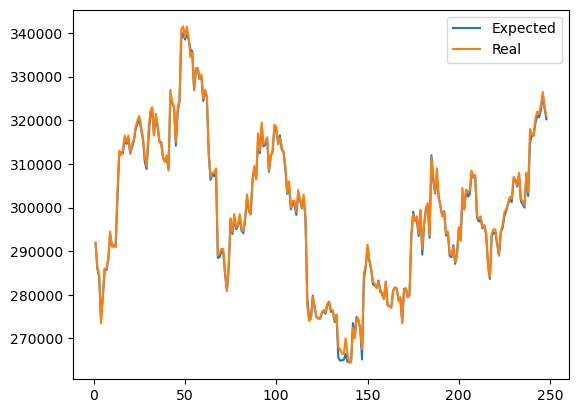

In [56]:
#한국 거래소 '정보데이터 시스템'에서 22년 11월 27일까지 농심 1년간 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/nongsim.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() # 아주 잘 맞추더라.